## K means Clustering

In [5]:
# Importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [4]:
# loading old customers data into data frame
odf = pd.read_excel("/home/omkar/Omkar Pawar/Data Science/KPMG Virtual Internship/Data/KPMG_CLEANED_Old_Customers_Data.xlsx").drop('Unnamed: 0', axis = 1)

In [5]:
odf.columns # odf : old customers data frame

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'gender',
       'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'full_name', 'age', 'address', 'postcode',
       'state', 'country', 'property_valuation'],
      dtype='object')

In [6]:
ndf = pd.read_excel("/home/omkar/Omkar Pawar/Data Science/KPMG Virtual Internship/Data/KPMG_CLEANED_New_Customers_Data.xlsx").drop('Unnamed: 0', axis = 1)

In [8]:
ndf.columns # ndf : new customers data frame

Index(['gender', 'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value', 'full_name', 'age'],
      dtype='object')

---

### Calculating Recency, Frequency, Monetary (RFM)

In [10]:
from datetime import datetime


# Converting 'transaction_date' to datetime
odf['transaction_date'] = pd.to_datetime(odf['transaction_date'])

# Calculating Recency, Frequency, and Monetary values
current_date = max(odf['transaction_date'])

# Recency
recency_df = odf.groupby('customer_id')['transaction_date'].max().reset_index()
recency_df['Recency'] = (current_date - recency_df['transaction_date']).dt.days

# Frequency
frequency_df = odf.groupby('customer_id')['transaction_id'].count().reset_index()
frequency_df.columns = ['customer_id', 'Frequency']

# Monetary
monetary_df = odf.groupby('customer_id')['list_price'].sum().reset_index()
monetary_df.columns = ['customer_id', 'Monetary']

# Merging DataFrames
rfm_df = pd.merge(recency_df[['customer_id', 'Recency']], frequency_df, on='customer_id')
rfm_df = pd.merge(rfm_df, monetary_df, on='customer_id')

# Assigning RFM scores
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], q=4, labels=[4, 3, 2, 1])
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'], q=4, labels=[1, 2, 3, 4])
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], q=4, labels=[1, 2, 3, 4])

# Combining RFM scores
rfm_df['RFM_Segment'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)


rfm_df


,customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment
0,1,7,11,9084.45,4,4,4,444
1,2,128,3,4149.07,1,1,2,112
2,4,195,2,1047.72,1,1,1,111
3,5,16,6,5903.20,4,3,3,433
4,6,64,5,5931.69,2,2,3,223
...,...,...,...,...,...,...,...,...
3481,3496,256,4,4725.38,1,1,2,112
3482,3497,52,3,3744.07,2,1,1,211
3483,3498,127,6,5177.06,1,3,2,132
3484,3499,51,7,7673.48,2,3,3,233


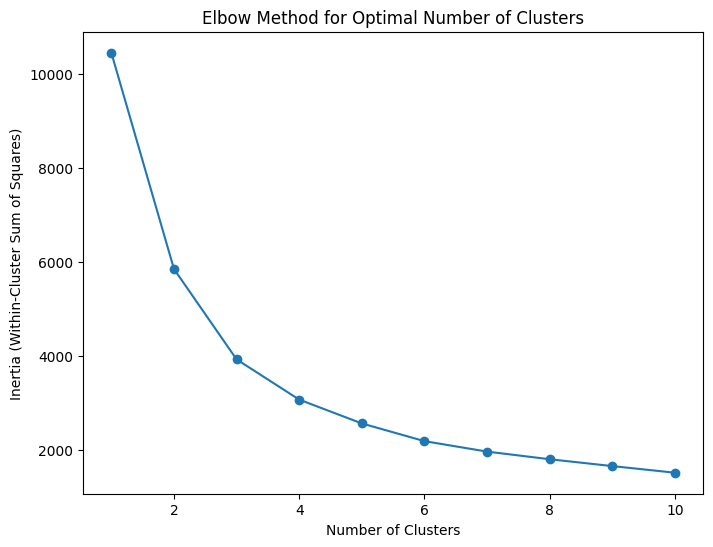

In [11]:
# Selected relevant features for clustering
selected_features = ['Recency', 'Frequency', 'Monetary']

# Extracting the selected features
X = rfm_df[selected_features]

# Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.show()

selecting K = 4

In [12]:
# Selected relevant features for clustering
selected_features = ['Recency', 'Frequency', 'Monetary']

X = rfm_df[selected_features]

# Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 4

# k-means clustering with k-means++
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(X_scaled)

rfm_df


,customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,Cluster
0,1,7,11,9084.45,4,4,4,444,2
1,2,128,3,4149.07,1,1,2,112,1
2,4,195,2,1047.72,1,1,1,111,1
3,5,16,6,5903.20,4,3,3,433,0
4,6,64,5,5931.69,2,2,3,223,0
...,...,...,...,...,...,...,...,...,...
3481,3496,256,4,4725.38,1,1,2,112,1
3482,3497,52,3,3744.07,2,1,1,211,3
3483,3498,127,6,5177.06,1,3,2,132,0
3484,3499,51,7,7673.48,2,3,3,233,0


In [18]:
# Merge the two DataFrames on 'customer_id'
merged_df = pd.merge(odf, rfm_df, left_on='customer_id', right_on='customer_id', how='inner')


In [14]:
import plotly.express as px

fig = px.scatter_3d(
    rfm_df,
    x='Recency',
    y='Frequency',
    z='Monetary',
    color='Cluster',
    title='K-means Clustering of RFM Features',
    labels={'Recency': 'Recency', 'Frequency': 'Frequency', 'Monetary': 'Monetary', 'Cluster': 'Cluster'},
    size_max=1,  # Set maximum marker size
)


fig.update_layout(scene=dict(aspectmode="cube"), width=1000, height=800)

fig.show()


cluster 2 is the one which is driving highest profit

![target cluster.png](<attachment:target cluster.png>)
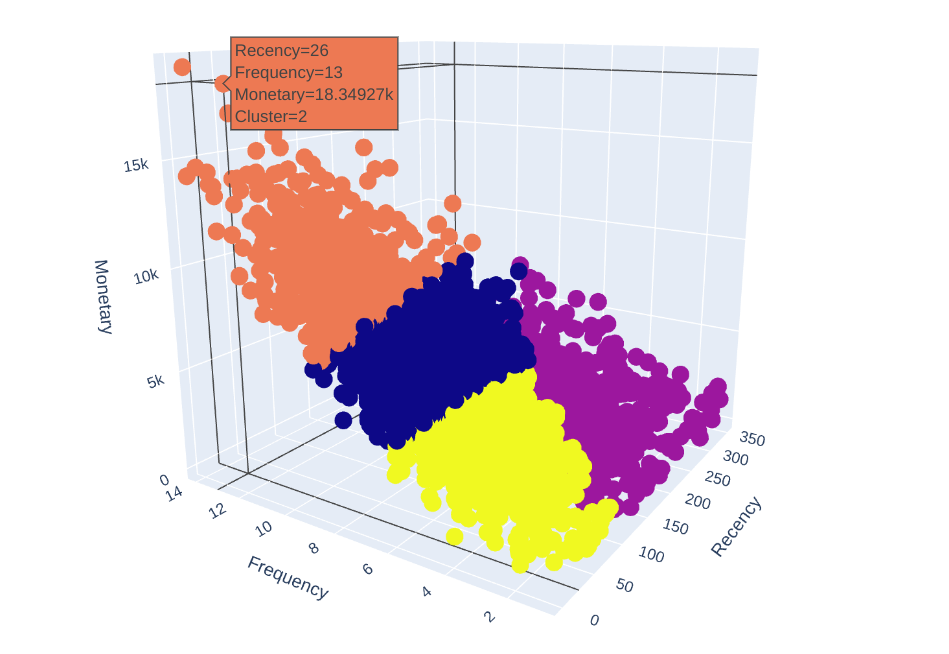

cluster 0
cluster 1
cluster 3

### save merged data frame for further tasks. 

In [19]:
merged_df.to_excel("/home/omkar/Omkar Pawar/Data Science/KPMG Virtual Internship/Data/rfm_clustered_df.xlsx")

---------

## Finding Target Customers

### Special Analysis of Cluster 2

In [21]:
df = pd.read_excel("/home/omkar/Omkar Pawar/Data Science/KPMG Virtual Internship/Data/rfm_clustered_df.xlsx")

In [22]:
cluster_2_df = df[df['Cluster'] == 2]

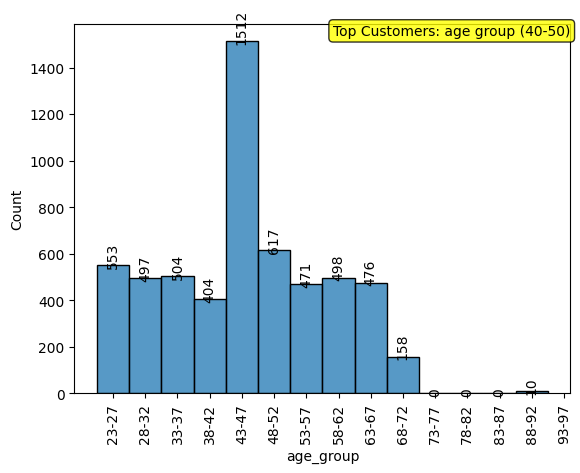

In [26]:
# Assuming 'cluster_2_df' is your DataFrame
min_age = cluster_2_df['age'].min()
max_age = cluster_2_df['age'].max()

# Calculate dynamic age bins
age_interval = 5
age_bins = range(min_age, max_age + age_interval + 1, age_interval)

cluster_2_df['age_group'] = pd.cut(cluster_2_df['age'], 
                                bins=age_bins, 
                                labels=[f'{start}-{end - 1}' for start, end in zip(age_bins[:-1], age_bins[1:])])

ax = sns.histplot(x='age_group', data=cluster_2_df, bins=len(age_bins) - 1)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', rotation='vertical')

# Rotate x-axis labels to 90 degrees
plt.xticks(rotation=90)

plt.text(1, 1, f'Top Customers: age group (40-50)', 
         transform=ax.transAxes, horizontalalignment='right', 
         verticalalignment='top', bbox=dict(facecolor='Yellow',
         edgecolor='black', boxstyle='round,pad=0.3', alpha=0.8))

plt.show()

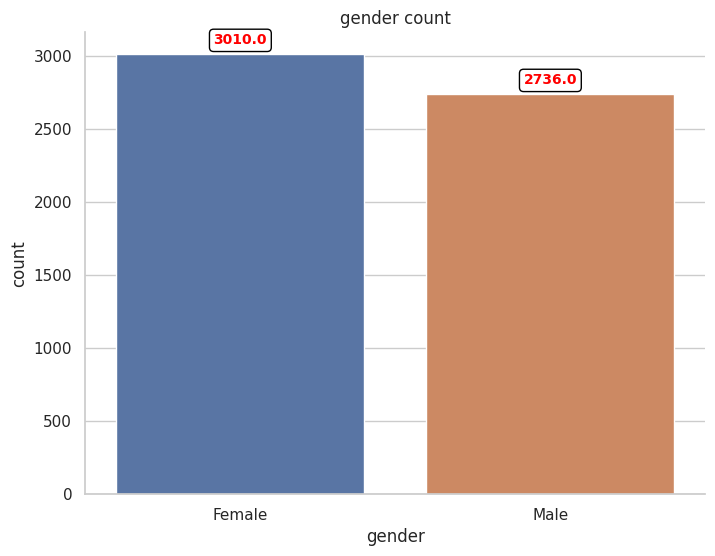

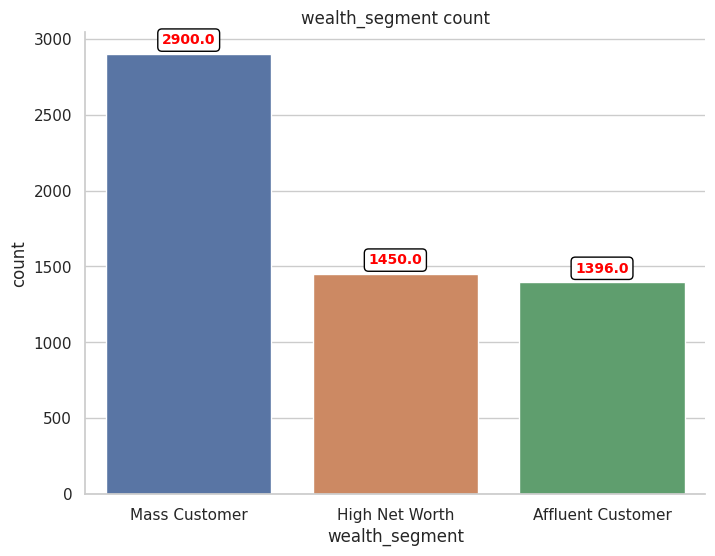

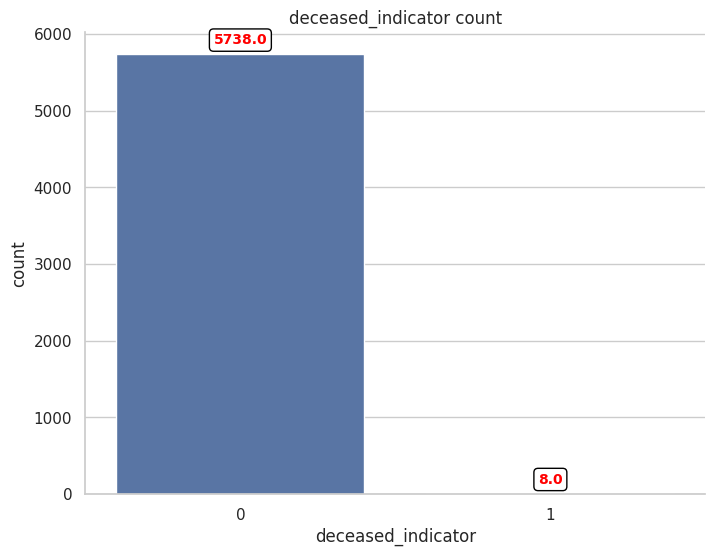

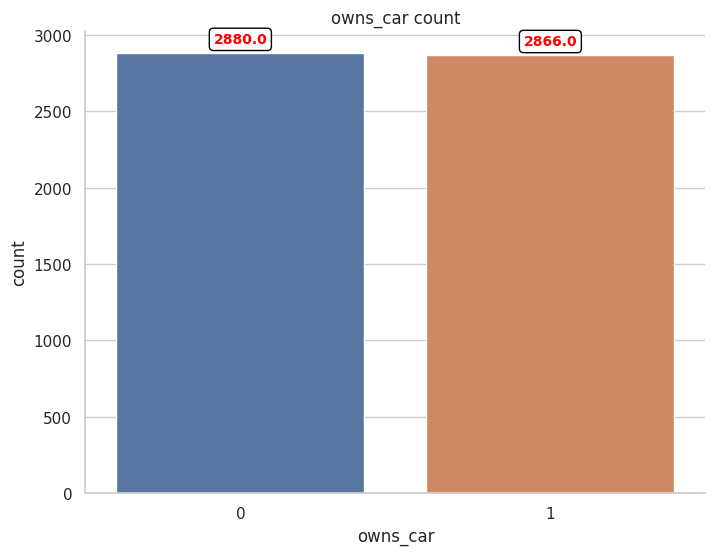

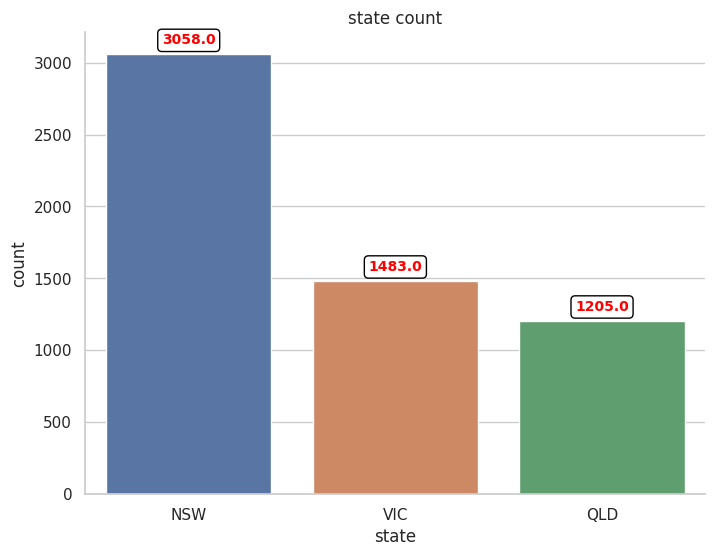

In [27]:
# List of categorical features
list_of_cat_features = ['gender', 'wealth_segment', 'deceased_indicator', 'owns_car', 'state']

# Function to create countplot for a categorical feature
def count_plot(cat_feature, data):

    plt.figure(figsize=(8, 6))
    sns.set_palette("pastel")  
    sns.set(style="whitegrid")  

    ax = sns.countplot(x=cat_feature, data=data, order=data[cat_feature].value_counts().index)

    for p in ax.patches:  
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',
                    fontsize=10, color='red', weight='bold',
                    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    sns.despine()
    plt.title(f'{cat_feature} count')
    plt.show()

#----------------------------------------
for cat_feature in list_of_cat_features:
    count_plot(cat_feature=cat_feature, data=cluster_2_df)


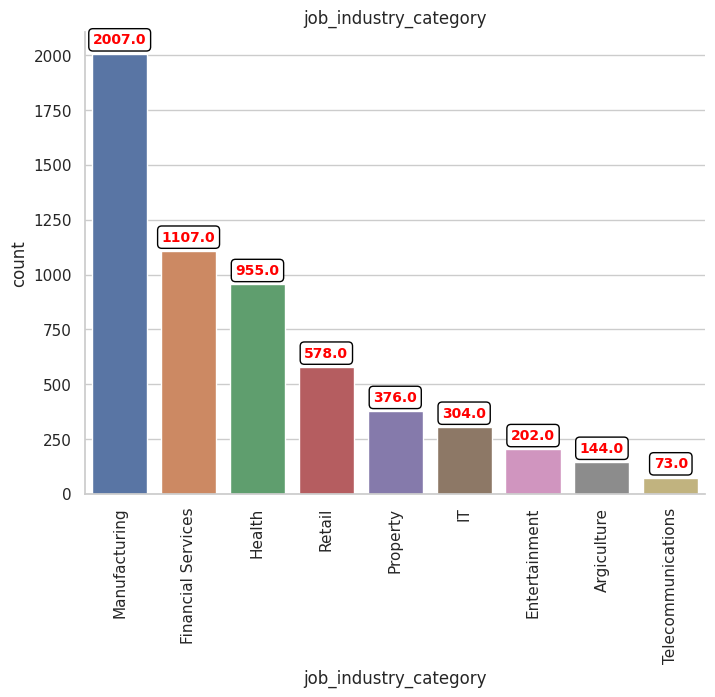

In [28]:

plt.figure(figsize=(8, 6))
sns.set_palette("pastel")
sns.set(style="whitegrid")

# Create a countplot using Seaborn
ax = sns.countplot(x='job_industry_category', data=cluster_2_df, order=cluster_2_df['job_industry_category'].value_counts().index)

for p in ax.patches: 
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', 
                fontsize=10, color='red', weight='bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))


plt.xticks(rotation= 90)
sns.despine()
plt.title('job_industry_category')
plt.show()

### Finding The Target Customers from New Customers list:

Cluster 2 : 
Who to target More:
1. Mass Customers
2. From `NSW` 
3. In `Manufacturing > Financial Services > Health Care` Job_Industry_Category
4. with age ranging from `40 - 50` as round figure. 

In [8]:
ndf.columns

Index(['gender', 'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value', 'full_name', 'age'],
      dtype='object')

In [9]:
# Filtering Out target Customers:

cluster_2_criteria = (
    (ndf['wealth_segment'] == 'Mass Customer') &
    (ndf['state'] == 'NSW') &
    (ndf['job_industry_category'].isin(['Manufacturing', 'Financial Services', 'Health Care'])) &
    (ndf['age'].between(40, 50, inclusive='both'))
)

Target_customers_list = ndf[cluster_2_criteria]
Target_customers_list[['full_name', 'age', 'gender', 'tenure', 'job_industry_category', 'wealth_segment','owns_car', 'Rank', 'Value', 'past_3_years_bike_related_purchases', 'state']]

,full_name,age,gender,tenure,job_industry_category,wealth_segment,owns_car,Rank,Value,past_3_years_bike_related_purchases,state
6,Rutledge Hallt,48,Male,8,Financial Services,Mass Customer,No,6,1.671875,23,NSW
55,Martelle Tuppeny,43,Female,9,Manufacturing,Mass Customer,No,54,1.381250,52,NSW
82,Esther Rooson,43,Female,5,Financial Services,Mass Customer,No,78,1.337500,14,NSW
127,Ricki Dobrowski,49,Male,9,Manufacturing,Mass Customer,Yes,127,1.250000,13,NSW
138,Daryl Pauncefort,45,Female,12,Financial Services,Mass Customer,Yes,133,1.237500,12,NSW
164,Emilie Brody,45,Female,3,Financial Services,Mass Customer,Yes,163,1.182031,3,NSW
183,Harlin Mazin,50,Male,13,Manufacturing,Mass Customer,Yes,181,1.158125,34,NSW
218,Dorian Stollen,44,Male,18,Financial Services,Mass Customer,Yes,219,1.125000,78,NSW
250,Sunny Christescu,49,Female,11,Financial Services,Mass Customer,No,250,1.075000,90,NSW
272,Theresa Cowper,48,Female,3,Manufacturing,Mass Customer,No,271,1.060000,99,NSW


----------